In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent=dataset[['age', 'bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [7]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [10]:
y_train,y_train.shape

(          charges
 1163   2200.83085
 196    5649.71500
 438   12592.53450
 183    7419.47790
 1298   5261.46945
 ...           ...
 763    3070.80870
 835    7160.33030
 1216   5415.66120
 559    1646.42970
 684    4766.02200
 
 [936 rows x 1 columns],
 (936, 1))

In [11]:
x_test,x_test.shape

(array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
        [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
        [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
        ...,
        [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
        [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
        [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]]),
 (402, 5))

In [12]:
y_test,y_test.shape

(          charges
 578    9724.53000
 610    8547.69130
 569   45702.02235
 1034  12950.07120
 198    9644.25250
 ...           ...
 1261   3277.16100
 494   17942.10600
 97    10226.28420
 418   14418.28040
 920   13451.12200
 
 [402 rows x 1 columns],
 (402, 1))

In [133]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='best',max_features='sqrt')
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_features='sqrt')

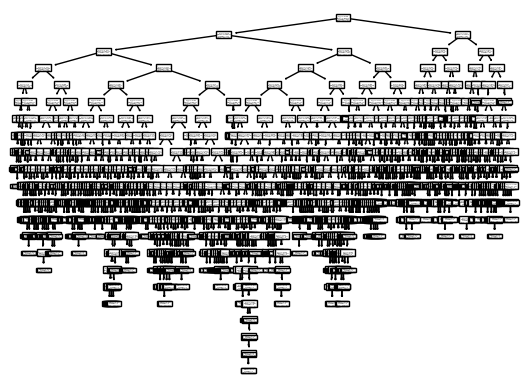

In [134]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()


In [138]:
y_pred=regressor.predict(x_test)

In [139]:
from sklearn.metrics import r2_score
R_value=r2_score(y_test,y_pred)

In [140]:
R_value

0.7052009320217727